### 將資料以指定格式讀入

In [2]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff("../hypothyroid_modified_cjlin.arff")
data = pd.DataFrame(data[0])
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,Class
0,41.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',1.30,2.5,125.0,1.14,109.0,b'SVHC',b'negative'
1,23.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',4.10,2.0,102.0,1.00,106.0,b'other',b'negative'
2,46.0,b'M',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.98,1.7,109.0,0.91,120.0,b'other',b'negative'
3,70.0,b'F',b't',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.16,1.9,175.0,1.00,106.0,b'other',b'negative'
4,70.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.72,1.2,61.0,0.87,70.0,b'SVI',b'negative'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,19.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',8.80,2.7,108.0,1.11,97.0,b'other',b'compensated_hypothyroid'
3394,68.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',1.00,2.1,124.0,1.08,114.0,b'SVI',b'negative'
3395,74.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',5.10,1.8,112.0,1.07,105.0,b'other',b'negative'
3396,72.0,b'M',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.70,2.0,82.0,0.94,87.0,b'SVI',b'negative'


### 將資料以指定格式讀入

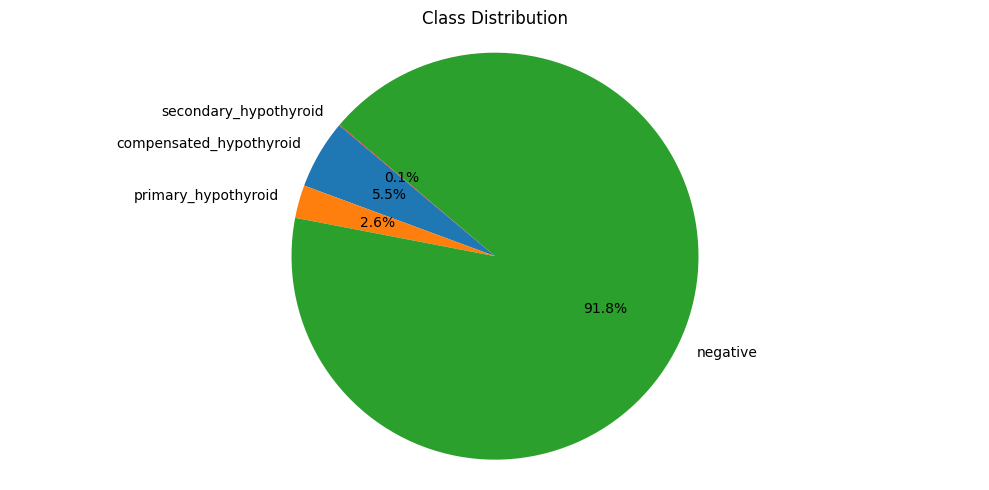

In [3]:
import matplotlib.pyplot as plt
ansType = {cls: 0 for cls in set(data["Class"])}
total = 0
for cls in data["Class"]:
    ansType[cls] += 1
    total += 1
    
# 將字串百分比轉成數值以便畫圖
labels = [key.decode() if isinstance(key, bytes) else str(key) for key in ansType.keys()]
values = [float(val) for val in ansType.values()]

# 畫出圓餅圖
plt.figure(figsize=(10, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Class Distribution")
plt.axis('equal')
plt.tight_layout()
plt.show()

### 資料轉成one-hot-encoding，切分資料(4:1)

In [4]:
from sklearn.model_selection import train_test_split

# one-hot-encoding
data = pd.get_dummies(data)

# x is features of result, y represent result collection
x = data.iloc[:,0:-4]
y = data.iloc[:,-4:]
# x, y _train are data used to training, x, y _test are used to test training of ML result
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2, random_state=42)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

data

,age,TSH,T3,TT4,T4U,FTI,sex_b'F',sex_b'M',on thyroxine_b'f',on thyroxine_b't',...,psych_b't',referral source_b'STMW',referral source_b'SVHC',referral source_b'SVHD',referral source_b'SVI',referral source_b'other',Class_b'compensated_hypothyroid',Class_b'negative',Class_b'primary_hypothyroid',Class_b'secondary_hypothyroid'
0,41.0,1.30,2.5,125.0,1.14,109.0,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
1,23.0,4.10,2.0,102.0,1.00,106.0,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
2,46.0,0.98,1.7,109.0,0.91,120.0,False,True,True,False,...,False,False,False,False,False,True,False,True,False,False
3,70.0,0.16,1.9,175.0,1.00,106.0,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
4,70.0,0.72,1.2,61.0,0.87,70.0,True,False,True,False,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,19.0,8.80,2.7,108.0,1.11,97.0,True,False,True,False,...,False,False,False,False,False,True,True,False,False,False
3394,68.0,1.00,2.1,124.0,1.08,114.0,True,False,True,False,...,False,False,False,False,True,False,False,True,False,False
3395,74.0,5.10,1.8,112.0,1.07,105.0,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
3396,72.0,0.70,2.0,82.0,0.94,87.0,False,True,True,False,...,False,False,False,False,True,False,False,True,False,False


### 建立 Autoencoder model

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_dim = x_train.shape[1]  # 應該是 41

# --- Encoder ---
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
encoded_output = Dense(8, activation='relu')(encoded)

# --- Decoder ---
decoded = Dense(16, activation='relu')(encoded_output)
decoded = Dense(32, activation='relu')(decoded)
decoded_output = Dense(input_dim, activation='sigmoid')(decoded)

# --- Autoencoder 模型 ---
autoencoder = Model(inputs=input_layer, outputs=decoded_output)

# --- Encoder 模型（壓縮後的輸出）---
encoder = Model(inputs=input_layer, outputs=encoded_output)


autoencoder.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',  # 或 tf.keras.losses.MeanSquaredError()
    metrics=['mae']
)

autoencoder.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 41)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 41)             │         1,353 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049 (15.82 KB)

 Trainable params: 4,049 (15.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K

x_train = np.random.rand(2718, 41).astype(K.floatx())
x_test = np.random.rand(680, 41).astype(K.floatx())

x_train = x_train.reshape((-1, 41, 1))
x_test = x_test.reshape((-1, 41, 1))

earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = autoencoder.fit(
    x_train,
    x_train,   # Autoencoder 輸入等於輸出
    epochs=400,
    batch_size=20,
    validation_data=(x_test, x_test),
    callbacks=[earlyStopping],
    verbose=1
)


Epoch 1/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0833 - mae: 0.2502 - val_loss: 0.0805 - val_mae: 0.2450
Epoch 2/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0786 - mae: 0.2415 - val_loss: 0.0769 - val_mae: 0.2376
Epoch 3/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0748 - mae: 0.2339 - val_loss: 0.0728 - val_mae: 0.2294
Epoch 4/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0718 - mae: 0.2273 - val_loss: 0.0721 - val_mae: 0.2273
Epoch 5/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0706 - mae: 0.2245 - val_loss: 0.0710 - val_mae: 0.2253
Epoch 6/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0694 - mae: 0.2223 - val_loss: 0.0702 - val_mae: 0.2233
Epoch 7/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0686 - mae: 0.2208 - val_loss: 0.0697 - val_mae: 0.2224
Epoch 8/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0680 - mae: 0.2196 - val_loss: 0.0697 - val_mae: 0.2223
Epoch 9/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

In [ ]:
history_dict = history.history

loss = history_dict['loss']            # 訓練集損失
val_loss = history_dict['val_loss']    # 驗證集損失
mae = history_dict.get('mae', None)    # 訓練集平均絕對誤差
val_mae = history_dict.get('val_mae', None)  # 驗證集平均絕對誤差

epochs = range(1, len(loss) + 1)

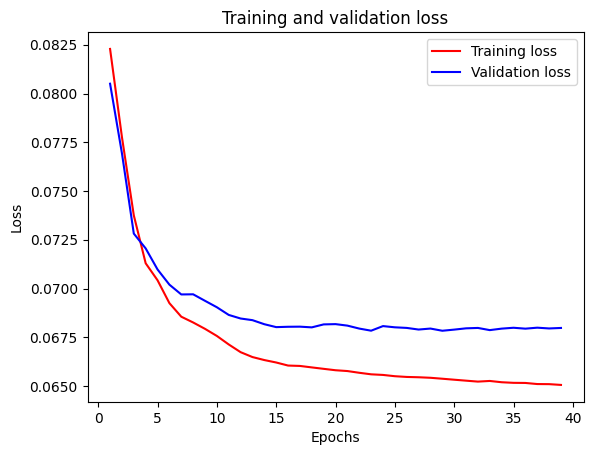

In [15]:
import matplotlib.pyplot as plt
plt.plot(epochs, loss, 'r', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

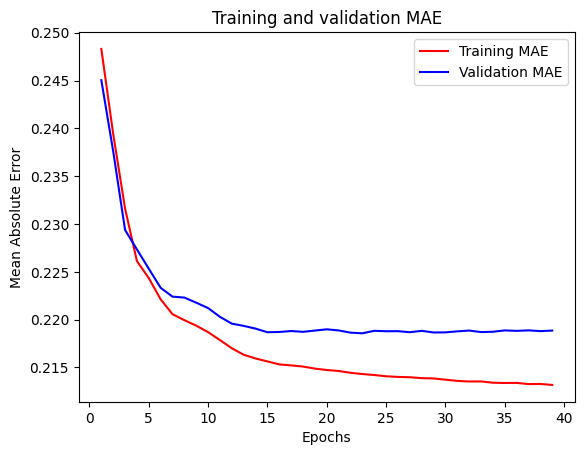

In [18]:
plt.clf()  # 清空當前圖表

plt.plot(epochs, mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')

plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()


In [22]:
autoencoder.evaluate(x_test, x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0675 - mae: 0.2179 


[0.06783553212881088, 0.21865972876548767]

1. Autoencoder 是重建（重構）問題，不是分類問題
Autoencoder 的目標是讓輸入數據經過編碼器和解碼器後重建回來，盡可能接近原始輸入。

它的輸出是連續值（或數值型向量），不是離散類別標籤。

2. MAE 是連續數值間的差異度量
MAE 衡量預測重建數值與原始輸入數值的絕對差異，是衡量「重建誤差」的好指標。

它直接反映輸出與輸入之間的平均距離，數值越小，代表重建越準確。

3. Accuracy 是分類指標，不適用於數值回歸
Accuracy 衡量分類正確率，計算預測標籤與真實標籤是否完全一致。

* Autoencoder 沒有「標籤」概念，也不做分類，使用 accuracy 沒有意義。

| 指標       | 適用任務               | 說明           |
| -------- | ------------------ | ------------ |
| MAE      | 回歸／重建（Autoencoder） | 測量重建輸出與輸入的差異 |
| Accuracy | 分類                 | 測量預測類別是否正確   |
